# Pymaceuticals Inc.
---

### Analysis

- The bar graph showed most mice were treated with Capomulin and Ramicane and Popriva with the lowest mice treated.
- Correlation: The correlation between mouse weight and the average tumor volume is 0.84 showng a positive correlation.
-  Tumor size: Drug Regimen Capomulin and Ramicane reduce the size of tumor better compared to the other drug regimen used. 
- Quartiles/Outliers: Infubinol had an outlier. Ceftamin shows the largest variance and Capomulin and Ramicane had smaller variance

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
number_mice = combined_df["Mouse ID"].nunique()
number_mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice_df = clean_df["Mouse ID"].nunique()
clean_mice_df

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
var = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std =  clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem =  clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume":mean,
                             "Median Tumor Volume": median,
                             "Tumor Volume Variance": var,
                             "Tumor Volume Std. Dev.":std,
                             "Tumor Volume Std. Err.":sem})
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
aggregate_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

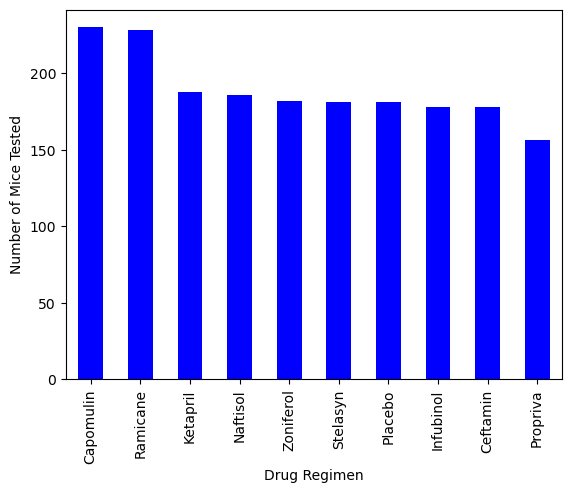

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_regimen = clean_df[["Drug Regimen","Timepoint"]]

#count for each drugs
drug_regimen = mice_regimen["Drug Regimen"].value_counts()
drug_regimen

drug_regimen.plot(kind="bar", color = "b",
                 xlabel= "Drug Regimen",
                 ylabel= "Number of Mice Tested")

plt.show()

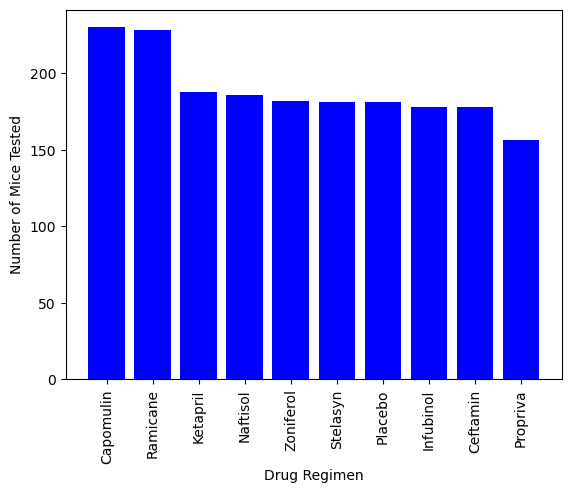

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
each_drug = drug_regimen.index.values
total_count = drug_regimen.values

plt.bar(each_drug, total_count, color="b", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()

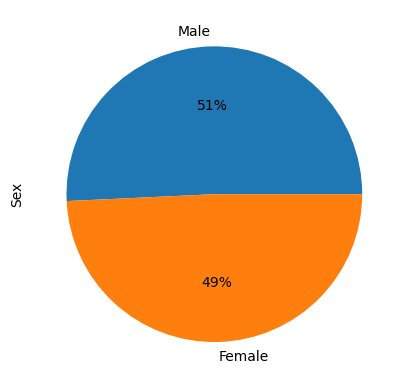

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = clean_df["Sex"].value_counts()
sex = ["Male", "Female"]
male_vs_female.plot(kind = "pie", autopct="%1.0f%%", ylabel="Sex")
plt.show()

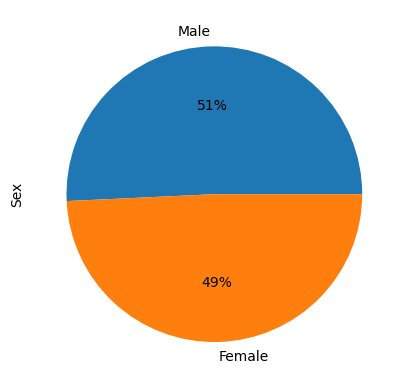

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_vs_femalePy = male_vs_female.index.values
count_values = male_vs_female.values
plt.ylabel("Sex")
plt.pie(count_values, labels = male_vs_femalePy, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_vol = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") |(clean_df["Drug Regimen"] == "Ramicane")|
                        (clean_df["Drug Regimen"] == "Infubinol") | (clean_df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = final_vol.groupby(["Drug Regimen","Mouse ID"]).last()
reset_last_timepoint = last_timepoint.reset_index()

capomulin_df = reset_last_timepoint.loc[reset_last_timepoint["Drug Regimen"] == "Capomulin"]

ramicane_df = reset_last_timepoint.loc[reset_last_timepoint["Drug Regimen"] == "Ramicane"]

infubinol_df = reset_last_timepoint.loc[reset_last_timepoint["Drug Regimen"] == "Infubinol"]
ceftamin_df = reset_last_timepoint.loc[reset_last_timepoint["Drug Regimen"] == "Ceftamin"]
ceftamin_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],
         "Ramicane": ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})

merged_df


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [26]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = []
for drug in reset_last_timepoint["Drug Regimen"]:
    if drug not in treatments:
        treatments.append(drug)

treatments
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []
upperq = []
lowerq = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.  
# Locate the rows which contain mice on each drug and get the tumor volume
    # add subset 
    # Determine outliers using upper and lower bounds


for drug in treatments:
    quartiles = merged_df[drug].quantile([.25,.5,.75])
    upperq = quartiles[.75]
    lowerq = quartiles[.25]
    iqr = upperq - lowerq

    #upperq.append(upperq)
    #lowerq.append(lowerq)
    #print(f"iqr for {drugs}: {drug_iqr}")

#upperq
#lowerq

upperq_bound = upperq + (1.5*iqr)
lowerq_bound = lowerq - (1.5*iqr)

Text(0.5, 0, '')

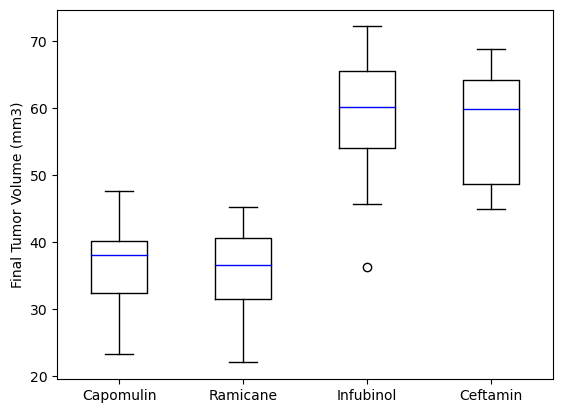

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = merged_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

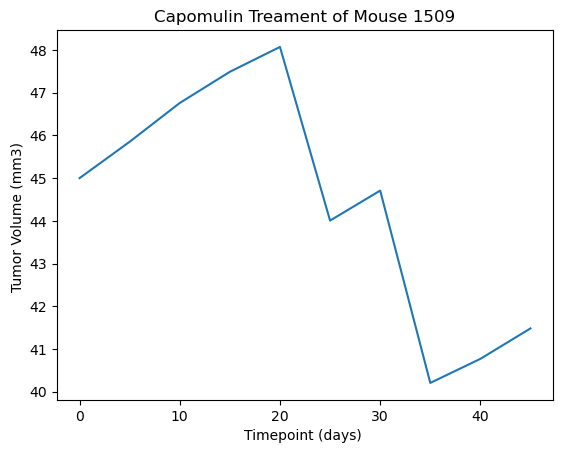

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "l509") ]
final_capomulin = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
final_capomulin = final_capomulin.set_index(["Timepoint"])

# Line plotting
tumor_vol = final_capomulin.values
timepoint_data = final_capomulin.index.values

plt.plot(timepoint_data, tumor_vol)
plt.title("Capomulin Treament of Mouse 1509")
plt.xlabel("Timepoint (days) ")
plt.ylabel("Tumor Volume (mm3) ")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

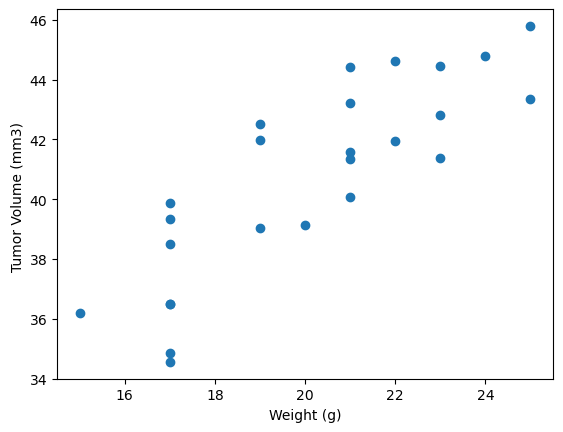

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#mouse weight vs tumor v

final_capomulin = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
capomulin_group = final_capomulin.groupby("Mouse ID")

#average, weight
tumor_avg = capomulin_group[("Tumor Volume (mm3)")].mean()
weight = capomulin_group["Weight (g)"].mean()
capomulin_avg = pd.DataFrame({"Weight (g)": weight,
                              "Tumor Volume (mm3) ": tumor_avg})
#scatterplot
plt.scatter(weight, tumor_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3) ")
plt.show


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


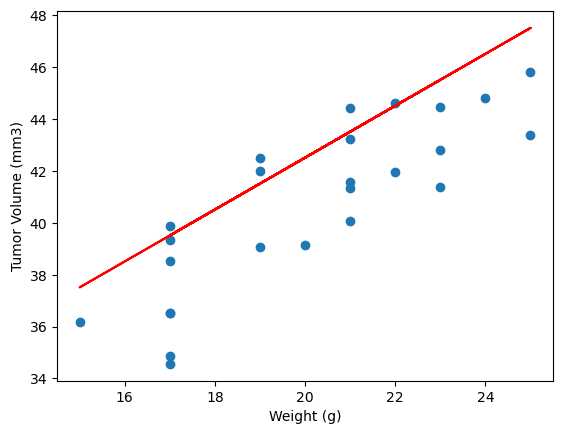

In [48]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(weight, tumor_avg)

#f"
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


#values

x_val = capomulin_avg["Weight (g)"]
y_val = capomulin_avg["Tumor Volume (mm3) "]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor_avg)

linear_reg_val = x_val + slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

#scatterplot

plt.scatter(x_val,y_val)
plt.plot(x_val,linear_reg_val,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
